# import data and import library

Data from: https://www.kaggle.com/code/davidminasyan/world-happiness-data-analysis/notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Import Data set 2015 - 2019
df_2015 = pd.read_csv("/archive/2015.csv",index_col='Country')
df_2016 = pd.read_csv("/archive/2016.csv",index_col='Country')
df_2017 = pd.read_csv("/archive/2017.csv",index_col='Country')
df_2018 = pd.read_csv("/archive/2018.csv",index_col='Country or region')
df_2019 = pd.read_csv("/archive/2019.csv",index_col='Country or region')

In [ ]:
# ทำการ drop column ที่ไม่ใช้ออก
df_2015 = df_2015.drop(columns=['Region','Standard Error','Dystopia Residual'])
df_2016 = df_2016.drop(columns=['Region','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval'])
df_2017 = df_2017.drop(columns=['Whisker.high','Whisker.low','Dystopia.Residual'])


In [ ]:
# ตั่งชื่อให้ column เพื่อง่ายต่อการเข้าใช้งาน
df_2015.columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']
df_2016.columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']
df_2017.columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Generosity', 'Corruption']
df_2018.columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Generosity', 'Corruption']
df_2019.columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Generosity', 'Corruption']

# เตรียม data ไว้เพื่อใช้ exploratory data

In [ ]:
# ทำ data ให้เป็น list เพื่อง่ายต่อการเรียกใช้
list_data = [df_2015,df_2016,df_2017,df_2018,df_2019]

In [ ]:
country_2015 = np.array(df_2015.index)
country_2016 = np.array(df_2016.index)
country_2017 = np.array(df_2017.index)
country_2018 = np.array(df_2018.index)
country_2019 = np.array(df_2019.index)

In [ ]:
# ฟังชันที่ใช้ในการ clean data
def clean_country(arr1,arr2,arr3,arr4,arr5):
  tmp = list(arr1)
  for country in tmp:
    if country not in arr2:
      tmp.remove(country)
    elif country not in arr3:
      tmp.remove(country)
    elif country not in arr4:
      tmp.remove(country)
    elif country not in arr5:
      tmp.remove(country)
  if not chack_country(arr1,arr2,arr3,arr4,arr5,tmp):
    tmp = clean_country(tmp,arr2,arr3,arr4,arr5)
  return tmp

def chack_country(arr1,arr2,arr3,arr4,arr5,country):
  for i in country:
    if i not in arr1:
      return False
    if i not in arr2:
      return False
    if i not in arr3:
      return False
    if i not in arr4:
      return False
    if i not in arr5:
      return False
  return True

In [ ]:
# เริ่ม clean data
list_country = clean_country(country_2015,country_2016,country_2017,country_2018,country_2019)
chack_country(country_2015,country_2016,country_2017,country_2018,country_2019,list_country)

True

In [ ]:
len(list_country)

141

In [ ]:
# ทำการสุ่มตัวอย่างประเทศที่จะทำการศึกษา
ran_country = np.random.choice(list_country,5,replace=False)
ran_country

array(['Bolivia', 'Bulgaria', 'Malaysia', 'Rwanda', 'Sri Lanka'],
      dtype='<U23')

In [ ]:
# ฟังชันที่ใช้ในการสร้าง Dataframe ของประเทศที่จะศึกษา
def mange_data(country,list_data):
  tmp_columns = ['Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']
  tmp_df = {}
  for column in tmp_columns:
    tmp = []
    for data in list_data:
      tmp.append(data[column].loc[country])
    tmp_df[column] = tmp
  tmp_df['years'] = [2015,2016,2017,2018,2019]
  print(country)
  return pd.DataFrame(tmp_df)


In [ ]:
tmp_df = mange_data(np.random.choice(ran_country,size=1)[0],list_data)
tmp_df

Malaysia


,Rank,Score,Economy,Family,Health,Freedom,Corruption,Generosity,years
0,61,5.770,1.124860,1.070230,0.723940,0.530240,0.105010,0.330750,2015
1,47,6.005,1.251420,0.880250,0.623660,0.390310,0.090810,0.414740,2016
2,42,6.084,1.291215,1.284646,0.618784,0.402265,0.065601,0.416609,2017
3,35,6.322,1.161000,1.258000,0.669000,0.356000,0.059000,0.311000,2018
4,80,5.339,1.221000,1.171000,0.828000,0.508000,0.024000,0.260000,2019


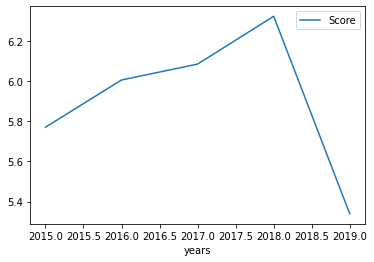

In [ ]:
tmp_df.plot.line(x = 'years',y='Score')

In [ ]:
# ฟังก์ชันใช้รวม data ของทุกปีในแต่ละประเทศ ค่า mean
def data_mean(list_data,list_country):
  tmp = []
  for country in list_country:
    tmp_df = dict(mange_data(country,list_data).mean())
    tmp_df['Country'] = country
    tmp.append(tmp_df)
  return pd.DataFrame(tmp,columns=['Country','Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity'])

In [ ]:
def func_csv(list_country,list_data):
  tmp_columns = ['Years','Country','Rank', 'Score', 'Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']
  tmp_year = 2015
  tmp_list = []
  for data in list_data:
    for country in list_country:
      tmpdict = dict(data.loc[country])
      tmpdict['Country'] = country
      tmpdict['Years'] = tmp_year
      tmp_list.append(tmpdict)
    tmp_year += 1
  tmp_df = pd.DataFrame(tmp_list,columns=tmp_columns, )
  return tmp_df

In [ ]:
tmp = func_csv(list_country,list_data)
tmp.to_excel('Data_2015-2019.xlsx')

In [ ]:
def index_null(data):
  tmp_clean = []
  for i in range(len(data)):
    for column in ['Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']:
      if data[column].loc[i] == 0:
        tmp_clean.append(i)
        break
  return tmp_clean

In [ ]:
data_2015_2019 = data_mean(list_data,list_country)
data_2015_2019 = data_2015_2019.drop(index_null(data_2015_2019))
print(len(data_2015_2019))
data_2015_2019.head()

Switzerland
Iceland
Denmark
Norway
Canada
Finland
Netherlands
Sweden
New Zealand
Australia
Israel
Costa Rica
Austria
Mexico
United States
Brazil
Luxembourg
Ireland
Belgium
United Arab Emirates
United Kingdom
Venezuela
Singapore
Panama
Germany
Chile
Qatar
France
Argentina
Czech Republic
Uruguay
Colombia
Thailand
Saudi Arabia
Spain
Malta
Kuwait
El Salvador
Guatemala
Uzbekistan
Slovakia
Japan
South Korea
Ecuador
Bahrain
Italy
Bolivia
Moldova
Paraguay
Kazakhstan
Slovenia
Lithuania
Nicaragua
Peru
Belarus
Poland
Malaysia
Croatia
Libya
Russia
Jamaica
Cyprus
Algeria
Kosovo
Turkmenistan
Mauritius
Estonia
Indonesia
Vietnam
Turkey
Kyrgyzstan
Nigeria
Bhutan
Azerbaijan
Pakistan
Jordan
Montenegro
China
Zambia
Romania
Serbia
Portugal
Latvia
Philippines
Morocco
Albania
Bosnia and Herzegovina
Dominican Republic
Mongolia
Greece
Lebanon
Hungary
Honduras
Tajikistan
Tunisia
Palestinian Territories
Bangladesh
Iran
Ukraine
Iraq
South Africa
Ghana
Zimbabwe
Liberia
India
Haiti
Congo (Kinshasa)
Nepal
Ethiopia
S

,Country,Rank,Score,Economy,Family,Health,Freedom,Corruption,Generosity
0,Switzerland,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
1,Iceland,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
2,Denmark,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
3,Norway,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
4,Canada,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598


# Data สมบูรณ์





In [ ]:
data_2015_2019.to_excel('Data_2015-2019_mean.xlsx')

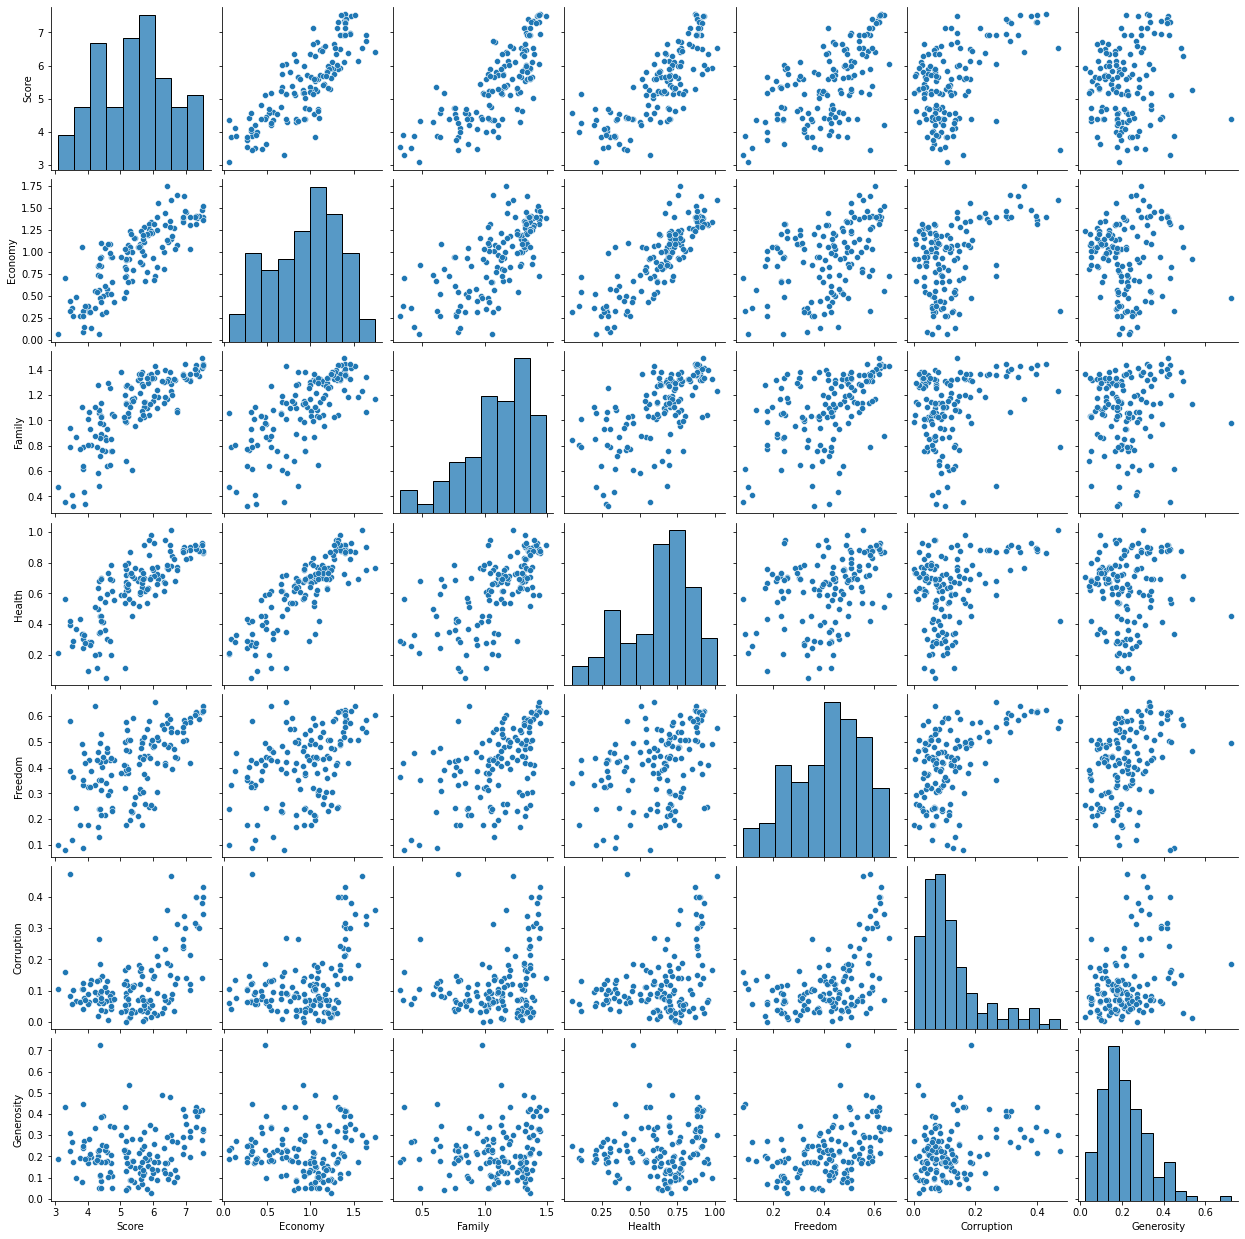

In [ ]:
sns.pairplot(data_2015_2019[['Score','Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']])

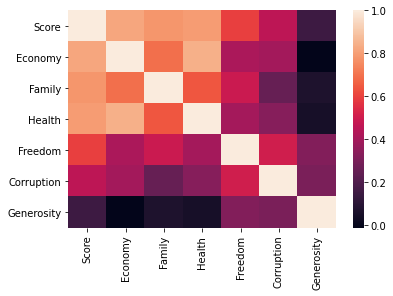

In [ ]:
sns.heatmap(data_2015_2019[['Score','Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']].corr())

# เริ่มทำโมเดล

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
#cell นี้เป็นการเตรียมข้อมูลลำกหรับการ train และ test model
best_r = {}
list_columns = ['Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity']

X = data_2015_2019[list_columns]
Y = data_2015_2019.Score

X_train ,X_test ,Y_train ,Y_test = train_test_split(data_2015_2019[list_columns],data_2015_2019['Score'],test_size = 0.30, random_state=0)

In [ ]:
#Regression แบบปกติ
model = LinearRegression(fit_intercept = False)
model.fit(X_train,Y_train)
tmp = model.predict(X)
best_r ['Simple_Regression'] = model.score(X_test,Y_test)
print('r**2 : ',model.score(X_test,Y_test))

r**2 :  0.8173516885404108


In [ ]:
#Regression แบบ cross validation
score_cr = []
for i in range(2,11):
  kf = KFold(n_splits=i,shuffle= True,random_state=0)
  model_cv = LinearRegression(fit_intercept = False)
  score_cv = cross_val_score(model_cv,X,Y,cv = kf,scoring='explained_variance')
  score_cr.append(score_cv.mean())
best_r ['Regression_cross_validation'] = max(score_cr)
# print(score_cr)
print('Best r**2 : ',max(score_cr))
print('Best num of cross : ',score_cr.index(max(score_cr))+2)

Best r**2 :  0.7077122572038919
Best num of cross :  3


In [ ]:
#Regression แบบใช้ L2 หรือ Ridge
from sklearn.linear_model import Ridge
score_ri = []
tmp_alpha = np.linspace(0,1,1000)
for i in tmp_alpha:
  model_ridge = Ridge(alpha= i,fit_intercept=False)
  model_ridge.fit(X_train,Y_train)
  score_ri.append(model_ridge.score(X_test,Y_test))
best_r ['Regression_Ridge'] = max(score_ri)
best_alpha_ri = tmp_alpha[score_ri.index(max(score_ri))]
print('Best r**2 : ',max(score_ri))
print('Best alpha : ',best_alpha_ri)

Best r**2 :  0.821475706056054
Best alpha :  0.3863863863863864


In [ ]:
#Regression แบบใช้ L1 หรือ Lasso
from sklearn.linear_model import Lasso
score_la = []
for i in tmp_alpha:
  model_lasso = Lasso(alpha= i,fit_intercept=False)
  model_lasso.fit(X_train,Y_train)
  score_la.append(model_lasso.score(X_test,Y_test))
best_r ['Regression_Lasso'] = max(score_la)
print('Best r**2 : ',max(score_la))
print('Best alpha : ',tmp_alpha[score_la.index(max(score_la))])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.402911440886896, tolerance: 0.29668122126162777
  positive)


Best r**2 :  0.8184544654958004
Best alpha :  0.003003003003003003


In [ ]:
tmp_plt = np.array(list(best_r.items()))
tmp_plt

array([['Simple_Regression', '0.8173516885404108'],
       ['Regression_cross_validation', '0.7077122572038919'],
       ['Regression_Ridge', '0.821475706056054'],
       ['Regression_Lasso', '0.8184544654958004']], dtype='<U27')

Best method is Regression_Ridge R**2 : 0.821475706056054


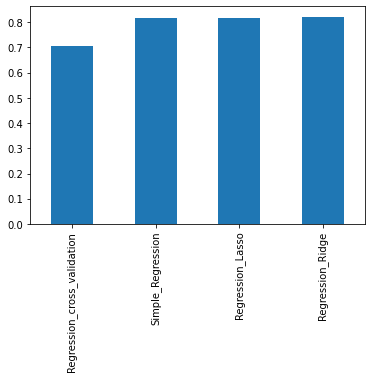

In [ ]:
#ทำ plot bar เพื่อดูว่าแบบไหนมีประสิทธิภาพสูงสุด
tmp_R = pd.Series(best_r).sort_values()
print('Best method is',tmp_R.idxmax(),'R**2 :',tmp_R.max())
tmp_R.plot.bar()

r**2 : 0.7109439871537202


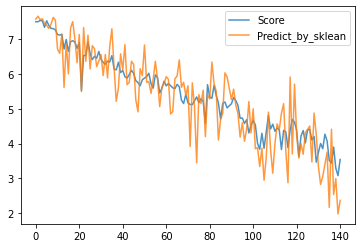

In [ ]:
best_model = Ridge(alpha= best_alpha_ri,fit_intercept=False)
best_model.fit(X_train,Y_train)
print('r**2 :',best_model.score(X,Y))
data_2015_2019['Predict_by_sklean'] = best_model.predict(X)
data_2015_2019[['Score','Predict_by_sklean']].plot(alpha = 0.8)

In [ ]:
params = pd.Series(best_model.coef_,index = X.columns)
params

Economy       0.569653
Family        2.328896
Health        1.936723
Freedom       1.829847
Corruption    0.641895
Generosity    0.964506
dtype: float64

# Statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model1 = sm.OLS(Y_test,X_test)
model1_re = model1.fit( )
print(model1_re.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1166.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.10e-39
Time:                        02:14:58   Log-Likelihood:                         -21.450
No. Observations:                  42   AIC:                                      54.90
Df Residuals:                      36   BIC:                                      65.33
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

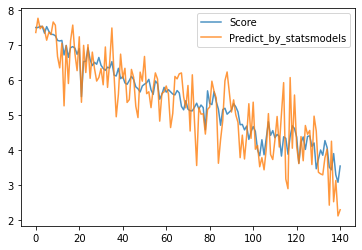

In [ ]:
data_2015_2019['Predict_by_statsmodels'] = model1_re.predict(X)
data_2015_2019[['Score','Predict_by_statsmodels']].plot(alpha = 0.8);

# เทียบ model ของ sklean กับ statsmodels

In [ ]:
data_2015_2019.head()

,Country,Rank,Score,Economy,Family,Health,Freedom,Corruption,Generosity,Predict_by_sklean,Predict_by_statsmodels,Predict_by_sklean_dis_corruption,Predict_by_statsmodels_dis_corruption,Predict_by_sklean_dis_health,Predict_by_statsmodels_dis_health,Predict_by_sklean_dis_both,Predict_by_statsmodels_dis_both
0,Switzerland,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,7.584372,7.369704,7.458365,7.336701,7.574398,7.351762,7.467430,7.313023
1,Iceland,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,7.668975,7.777668,7.699450,7.816805,7.665786,7.772717,7.691700,7.818212
2,Denmark,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,7.571496,7.477055,7.414167,7.426759,7.628944,7.496744,7.494843,7.438506
3,Norway,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,7.595375,7.552260,7.500196,7.537140,7.750532,7.588667,7.668470,7.571677
4,Canada,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,7.456065,7.445113,7.379928,7.439720,7.439150,7.437186,7.374602,7.430770


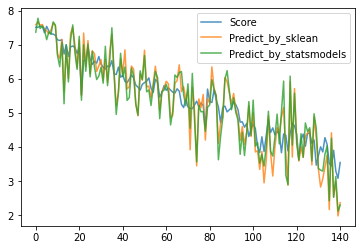

In [ ]:
data_2015_2019[['Score','Predict_by_sklean','Predict_by_statsmodels']].plot(alpha = 0.8);

**stats models เราจะเห็นในช่องของ P-valus ที่จะบอกว่าตัวแปรไหนที่มีความสำคัญในสมการบ้าง จึงจะลองนำตัวแปรที่ไม่สำคัญเหล่านั้นออกและลองสร้างโมเดลดู**

ลองตัด Corruption

In [ ]:
tmp_r = []
list_columns = ['Economy','Family', 'Health', 'Freedom', 'Generosity']

X = data_2015_2019[list_columns]
Y = data_2015_2019.Score

X_train ,X_test ,Y_train ,Y_test = train_test_split(data_2015_2019[list_columns],data_2015_2019['Score'],test_size = 0.30, random_state=0)

r**2 : 0.7094874181636882


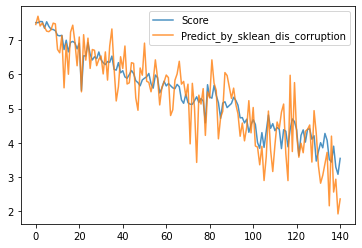

In [ ]:
best_model = Ridge(alpha= best_alpha_ri,fit_intercept=False)
best_model.fit(X_train,Y_train)
tmp = best_model.score(X,Y)
tmp_r.append(tmp)
print('r**2 :',tmp)
data_2015_2019['Predict_by_sklean_dis_corruption'] = best_model.predict(X)
data_2015_2019[['Score','Predict_by_sklean_dis_corruption']].plot(alpha = 0.8)

In [ ]:
params = pd.Series(best_model.coef_,index = X.columns)
params

Economy       0.609695
Family        2.310157
Health        1.918996
Freedom       1.969650
Generosity    1.018796
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1433.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):                    2.90e-41
Time:                        14:42:54   Log-Likelihood:                         -21.513
No. Observations:                  42   AIC:                                      53.03
Df Residuals:                      37   BIC:                                      61.71
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

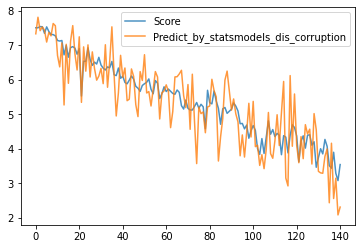

In [ ]:
model1 = sm.OLS(Y_test,X_test)
model1_re = model1.fit()
print(model1_re.summary())
data_2015_2019['Predict_by_statsmodels_dis_corruption'] = model1_re.predict(X)
data_2015_2019[['Score','Predict_by_statsmodels_dis_corruption']].plot(alpha = 0.8);

ลองตัด Health

In [ ]:
list_columns = ['Economy','Family', 'Freedom','Corruption', 'Generosity']

X = data_2015_2019[list_columns]
Y = data_2015_2019.Score

X_train ,X_test ,Y_train ,Y_test = train_test_split(data_2015_2019[list_columns],data_2015_2019['Score'],test_size = 0.30, random_state=0)

r**2 : 0.6680197263560734


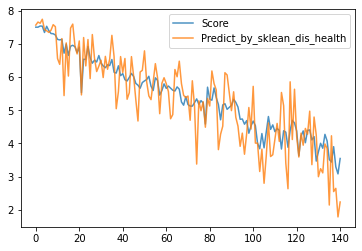

In [ ]:
best_model = Ridge(alpha= best_alpha_ri,fit_intercept=False)
best_model.fit(X_train,Y_train)
tmp = best_model.score(X,Y)
tmp_r.append(tmp)
print('r**2 :',tmp)
data_2015_2019['Predict_by_sklean_dis_health'] = best_model.predict(X)
data_2015_2019[['Score','Predict_by_sklean_dis_health']].plot(alpha = 0.8)

In [ ]:
params = pd.Series(best_model.coef_,index = X.columns)
params

Economy       1.421337
Family        2.580405
Freedom       2.119812
Corruption    0.544543
Generosity    1.089360
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1391.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):                    5.02e-41
Time:                        14:42:55   Log-Likelihood:                         -22.136
No. Observations:                  42   AIC:                                      54.27
Df Residuals:                      37   BIC:                                      62.96
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

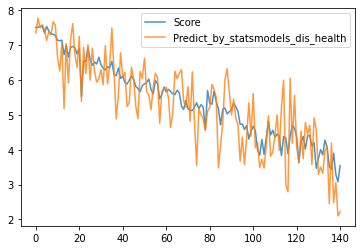

In [ ]:
model1 = sm.OLS(Y_test,X_test)
model1_re = model1.fit()
print(model1_re.summary())
data_2015_2019['Predict_by_statsmodels_dis_health'] = model1_re.predict(X)
data_2015_2019[['Score','Predict_by_statsmodels_dis_health']].plot(alpha = 0.8);

r^2 ของ sklean ridge กลับลดลง ในการทดลองทั้งตัด Corruption และ Health แต่ stats models กลับมี r^2 เท่าเดิม

ลองตัดทั้ง Corruption และ Health 

In [ ]:
list_columns = ['Economy','Family', 'Freedom', 'Generosity']

X = data_2015_2019[list_columns]
Y = data_2015_2019.Score

X_train ,X_test ,Y_train ,Y_test = train_test_split(data_2015_2019[list_columns],data_2015_2019['Score'],test_size = 0.30, random_state=0)

r**2 : 0.6676903288546092


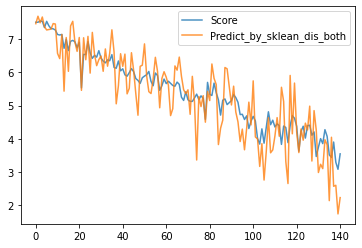

In [ ]:
best_model = Ridge(alpha= best_alpha_ri,fit_intercept=False)
best_model.fit(X_train,Y_train)
tmp = best_model.score(X,Y)
tmp_r.append(tmp)
print('r**2 :',tmp)
data_2015_2019['Predict_by_sklean_dis_both'] = best_model.predict(X)
data_2015_2019[['Score','Predict_by_sklean_dis_both']].plot(alpha = 0.8)

In [ ]:
params = pd.Series(best_model.coef_,index = X.columns)
params

Economy       1.448730
Family        2.562530
Freedom       2.236322
Generosity    1.134510
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1779.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):                    1.19e-42
Time:                        14:42:56   Log-Likelihood:                         -22.218
No. Observations:                  42   AIC:                                      52.44
Df Residuals:                      38   BIC:                                      59.39
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

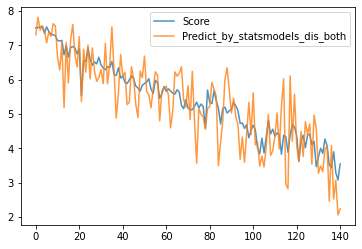

In [ ]:
model1 = sm.OLS(Y_test,X_test)
model1_re = model1.fit()
print(model1_re.summary())
data_2015_2019['Predict_by_statsmodels_dis_both'] = model1_re.predict(X)
data_2015_2019[['Score','Predict_by_statsmodels_dis_both']].plot(alpha = 0.8);

**สรุป Data table และ R^2**

In [ ]:
data_2015_2019.head()

,Country,Rank,Score,Economy,Family,Health,Freedom,Corruption,Generosity,Predict_by_sklean,Predict_by_statsmodels,Predict_by_sklean_dis_corruption,Predict_by_statsmodels_dis_corruption,Predict_by_sklean_dis_health,Predict_by_statsmodels_dis_health,Predict_by_sklean_dis_both,Predict_by_statsmodels_dis_both
0,Switzerland,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,7.584372,7.369704,7.458365,7.336701,7.574398,7.351762,7.467430,7.313023
1,Iceland,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,7.668975,7.777668,7.699450,7.816805,7.665786,7.772717,7.691700,7.818212
2,Denmark,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,7.571496,7.477055,7.414167,7.426759,7.628944,7.496744,7.494843,7.438506
3,Norway,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,7.595375,7.552260,7.500196,7.537140,7.750532,7.588667,7.668470,7.571677
4,Canada,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,7.456065,7.445113,7.379928,7.439720,7.439150,7.437186,7.374602,7.430770


In [ ]:
print(tmp_r)

[0.7094874181636882, 0.6680197263560734, 0.6676903288546092]


In [ ]:
print(best_alpha_ri)

0.3863863863863864


กล่าวได้ว่า model ที่ดีที่สุดจาก SKlean ที่เราลองสร้างขึ้นมาคือ Ridge หรือ L2 ที่ alpha คือ 0.3863863863863864 โดยมีตัวแปรที่เกี่ยวข้องคือ ['Economy','Family', 'Health', 'Freedom','Corruption', 'Generosity'] และตัวแปรที่มีผลกับ happy score คือ 'Family'